# TNBC Dataset from Forest White/Tigist Tamir

- *Goal*: We were sent a dataset from Tigist Tamir (postdoc in the lab of Forest White) containing phosphotyrosine-enriched mass spec data from 152 TNBC patients. She has asked us to apply KSTAR to the dataset and identify patient-specific kinases and targetable nodes.
- *Data*: Provided data consists of 2963 tyrosine sites for 152 samples (there are some repeated measurements for each patient, indicated by a/b in column name). 
- *Method*: This notebook focuses on data processing. 1) Identify data columns. 2) Map Data. Mapped data will be run through activity calculation on Rivanna.

In [2]:
import pandas as pd
import numpy as np
import os
from kstar import config, mapping, helpers

In [3]:
data = pd.read_csv('pY_union_b.csv')
data

,Label,Gene,Accessions,Site,Motif,25286,9818,27499,26750,14691,...,27046,8356,26440a,4670,26665,22367,8488,10862,27594,27092
0,ABL1_Y393,ABL1,P00519,Y393,RLMtGDtytAHAGAk,0.832530,0.790839,0.367353,0.836639,1.796101,...,0.761856,0.994987,0.658800,0.855514,1.371503,0.427679,0.781812,0.207050,1.903236,1.449376
1,ACE2_Y781,ACE2,Q9BYF1,Y781,ARSGENPyAsIDISK,1.101053,0.934455,0.829506,0.688528,1.466261,...,0.181935,0.380973,26.856590,4.258550,0.702962,0.400547,0.574808,0.317215,0.803495,0.639574
2,ACTB_Y188,ACTB,P60709,Y188,AGRDLtDyLMkILtE,0.789721,0.738451,0.306313,0.431742,0.701092,...,0.466809,0.906247,0.820188,0.591617,0.907036,0.431522,0.259690,0.429754,0.898366,0.804096
3,ACTB_Y198,ACTB,P60709,Y198,kILtERGysFtttAE,0.665511,0.538342,0.243347,0.291878,0.646243,...,0.689367,0.877135,0.618301,0.620592,0.706483,0.438045,0.259539,0.287783,0.988633,0.645519
4,ACTB_Y218,ACTB,P60709,Y218,DIkEkLCyVALDFEQ,0.804936,0.677950,0.476851,0.352506,0.841166,...,0.708070,1.125259,1.046820,1.331396,1.072994,0.856978,0.211415,0.485552,1.415230,1.464059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,SPRY1_Y53,SPRY1,O43609,Y53,AIRGsNEytEGPSVV,NaN,NaN,NaN,NaN,NaN,...,0.884246,0.867430,0.844168,1.126177,1.352933,0.630950,0.662507,0.587368,1.151678,1.065317
2960,SRSF4_Y53,SRSF4,Q08170,Y53,RDADDAVyELNGkDL,NaN,NaN,NaN,NaN,NaN,...,1.011389,0.600734,0.649448,1.024353,1.458706,0.696951,0.420662,0.308189,1.013308,0.856990
2961,TMEM106B_T54,TMEM106B,Q9NUM4,T54,NGDVSQFPYVEFTGR,NaN,NaN,NaN,NaN,NaN,...,0.932030,NaN,0.729356,0.798257,1.466459,1.831287,0.579650,0.286560,0.960884,1.968367
2962,"TUBA1B_T271, Y272",TUBA1B,P68363,"T271, Y272","RIHFPLAtyAPVIsA, IHFPLAtyAPVIsAE",NaN,NaN,NaN,NaN,NaN,...,0.906345,0.765901,0.417120,0.685445,0.591664,NaN,0.573819,0.193387,0.718701,0.563319


In [4]:
#add 'data:' to front of data columns
non_data_cols = ['Label','Gene', 'Accessions', 'Site', 'Motif']
new_cols = {}
for col in data.columns:
    if col not in non_data_cols:
        new_cols[col] = 'data:'+col
data = data.rename(new_cols, axis = 1)

## Map Data to KinPred

In [5]:
#define the directory where mapped dataset and run information will be saved.
odir = './'
#if directory doesn't exist yet, create it
if not os.path.exists(f"{odir}/MAPPED_DATA"):
    os.mkdir(f"{odir}/MAPPED_DATA")
    
#Define the log name
logName = 'TNBC_Tamir'
#intialize logger
mapping_log = helpers.get_logger(f"mapping_{logName}", f"{odir}/MAPPED_DATA/mapping_{logName}.log")

mapDict = {'peptide':'Motif', 'accession_id':'Accessions'}


#map dataset and record process in the logger
exp_mapper = mapping.ExperimentMapper(experiment = data,
                                      columns = mapDict,
                                      logger = mapping_log)
#save mapped dataset
exp_mapper.experiment.to_csv(f"{odir}/MAPPED_DATA/{logName}_mapped.tsv", sep = '\t', index = False)

## Determine threshold

In [6]:
from kstar import calculate

In [12]:
#define the directory where mapped dataset and run information will be saved.
odir = './'
logName = 'TNBC_Tamir'
#Name
logName_new = logName + '_Y'
#if directory does not exits, create it
if not os.path.exists(f"{odir}/RESULTS"):
    os.mkdir(f"{odir}/RESULTS")
#intialize log file
activity_log = helpers.get_logger(f"activity_{logName_new}", f"{odir}/RESULTS/activity_{logName_new}.log")


#Define parameters
data_columns = None
agg = 'mean'
greater = True
threshold = 1.3


#intialize KinaseActivity class object
kinact = calculate.KinaseActivity(exp_mapper.experiment, activity_log,data_columns = data_columns, phospho_type=['Y'])
#convert evidence into binary evidence based on the provided threshold
evidence_binary = kinact.create_binary_evidence(agg = agg, threshold = threshold,  greater = True)

In [13]:
#inspect the number of sites used for each sample
data_cols = [col for col in evidence_binary.columns if 'data:' in col]
evidence_binary[data_cols].sum()

data:25286     44
data:9818      26
data:27499      6
data:26750     26
data:14691    184
             ... 
data:22367     15
data:8488      64
data:10862      3
data:27594    216
data:27092    164
Length: 152, dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [14]:
evidence_binary

,KSTAR_ACCESSION,KSTAR_SITE,data:25286,data:9818,data:27499,data:26750,data:14691,data:14242,data:26946,data:26614,...,data:26440a,data:4670,data:26665,data:22367,data:8488,data:10862,data:27594,data:27092,KSTAR_NUM_COMPENDIA,KSTAR_NUM_COMPENDIA_CLASS
0,A0FGR8,Y824,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,1.0
1,A1X283,Y855,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,1.0
2,A6NI28,Y376,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3.0,1.0
3,A7E2Y1,Y455,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0
4,A7KAX9,Y1520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,Q9Y4H2,Y675,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.0,2.0
2490,Q9Y572,Y230,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2491,Q9Y597,Y813,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2492,Q9Y5K3,Y216,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0


(array([66., 27., 20., 12.,  7.,  6.,  2.,  2.,  5.,  5.]),
 array([   3. ,  135.2,  267.4,  399.6,  531.8,  664. ,  796.2,  928.4,
        1060.6, 1192.8, 1325. ]),
 <BarContainer object of 10 artists>)

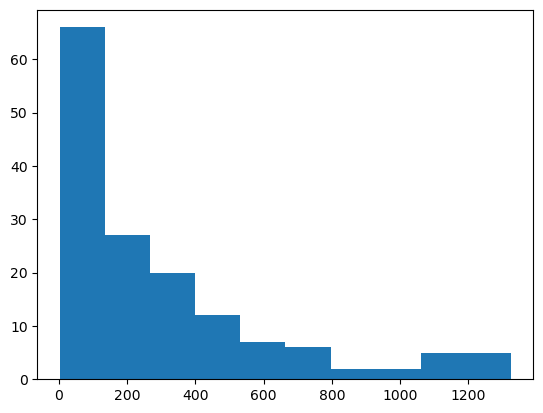

In [15]:
plt.hist(evidence_binary[data_cols].sum())

### Grab Top N sites

In [1]:
import os
import pandas as pd
import numpy as np

In [4]:
#load mapped dataset
#save mapped dataset
odir = './'
logName = 'TNBC_Tamir'
#if directory doesn't exist yet, create it
if not os.path.exists(f"{odir}/MAPPED_DATA"):
    os.mkdir(f"{odir}/MAPPED_DATA")
    
#Define the log name
experiment = pd.read_csv(f"{odir}/MAPPED_DATA/{logName}_mapped.tsv", sep = '\t')

In [5]:
data_cols = [col for col in experiment.columns if 'data:'  in col]

In [6]:
greater = True
evidence_size = 100

experiment2 = experiment.groupby(['KSTAR_ACCESSION', 'KSTAR_SITE']).agg('mean').reset_index()
#set the binary evidence for whether a site is included
#create the list 
for col in data_cols:
    #check how many non_nan sites there (if less than N, set n to be equal to number of sites available
    num_sites_available = experiment2.dropna().shape[0]
    if num_sites_available >= evidence_size:
        n = evidence_size
    else:
        n = num_sites_available

    if greater:
        max_indices = np.argsort(-experiment2[col].values)[0:n]
        experiment2[col] = 0
        col_loc = np.where(experiment2.columns == col)[0][0]
        experiment2.iloc[max_indices, col_loc] = 1
    else:
        min_indices = np.argsort(experiment2[col].values)[0:n]
        experiment2[col] = 0
        col_loc = np.where(experiment2.columns == col)[0][0]
        experiment2.iloc[min_indices, col_loc] = 1

In [7]:
experiment2.to_csv('TNBC_tamir_mapped_top100_sites.tsv', sep = '\t')

### Testing 

#### option 1

In [19]:
import time

In [37]:
start = time.time()
N = 200
test = experiment.copy()
test = test.groupby(['KSTAR_ACCESSION', 'KSTAR_SITE']).agg('mean').reset_index()
test = test[test['KSTAR_SITE'].str.startswith('Y')]
fill_array = list(np.repeat(1, N)) + list(np.repeat(0, test.shape[0] - N))
for col in data_cols:
    test = test.sort_values(by = col, ascending = False)
    test[col] = fill_array
stop = time.time()
print(stop -start)

0.6236834526062012


#### option 2

In [21]:
test

,KSTAR_ACCESSION,KSTAR_SITE,data:25286,data:9818,data:27499,data:26750,data:14691,data:14242,data:26946,data:26614,...,data:26440a,data:4670,data:26665,data:22367,data:8488,data:10862,data:27594,data:27092,KSTAR_NUM_COMPENDIA,KSTAR_NUM_COMPENDIA_CLASS
540,P04083,Y21,0,1,0,0,1,1,1,0,...,0,1,0,0,1,0,1,1,5.0,2.0
563,P04626,Y877,0,0,1,0,1,1,1,1,...,1,1,1,1,0,0,1,1,4.0,2.0
3644,Q8NHJ6,Y360,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,4.0,2.0
3987,Q99439,Y231,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1.0,1.0
1712,P30273,Y76,1,1,0,1,1,1,1,1,...,0,1,1,0,0,0,0,1,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,Q04912,Y1239,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,2.0
2684,Q04912,Y1238,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.0,2.0
2579,Q00526,Y15,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,4.0,2.0
2580,Q00526,Y19,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,4.0,2.0


In [74]:
start = time.time()
N = 10
test2 = experiment.copy()
test2 = test2.groupby(['KSTAR_ACCESSION', 'KSTAR_SITE']).agg('mean').reset_index()
test2 = test2[test2['KSTAR_SITE'].str.startswith('Y')]
for j, col in enumerate(data_cols):
    if test2.dropna().shape[0] >= N:
        max_indices = np.argsort(-test2[col].values)[0:N]
        test2[col] = 0
        test2.iloc[max_indices, j+2] = 1
    else:
        max_indices = np.argsort(-test2[col].values)[0:test2.dropna().shape[0]]
        test2[col] = 0
        col_loc = np.where)
        test2.iloc[max_indices, j+2] = 1
        
stop = time.time()
print(stop -start)

0.392242431640625


In [85]:
test2.iloc[:,np.where(test2.columns == col)[0][0]]

1       0
3       0
5       0
6       0
7       0
       ..
4657    0
4658    0
4659    0
4660    0
4666    0
Name: data:27092, Length: 2494, dtype: int64

In [86]:
col

'data:27092'

In [79]:
test3.sort_values(by = 'data:26614', ascending = False).iloc[0:10]

,KSTAR_ACCESSION,KSTAR_SITE,data:25286,data:9818,data:27499,data:26750,data:14691,data:14242,data:26946,data:26614,...,data:26440a,data:4670,data:26665,data:22367,data:8488,data:10862,data:27594,data:27092,KSTAR_NUM_COMPENDIA,KSTAR_NUM_COMPENDIA_CLASS
1710,P30273,Y58,1.882159,0.992883,0.219614,0.677414,1.851912,0.842373,1.011017,3.254937,...,0.317986,2.303982,1.676990,0.273821,0.354222,0.187670,1.387937,2.529379,1.0,1.0
1711,P30273,Y65,1.882159,0.992883,0.219614,0.677414,1.851912,0.842373,1.011017,3.254937,...,0.317986,2.303982,1.676990,0.273821,0.354222,0.187670,1.387937,2.529379,5.0,2.0
3225,Q16539,Y182,1.470649,0.987125,0.643827,1.654023,1.044057,0.895959,1.322563,2.748084,...,0.890430,0.882157,2.292855,0.357951,0.611249,0.468964,1.123423,1.429391,5.0,2.0
1892,P42224,Y701,2.098609,1.243442,0.432231,0.900066,1.789498,1.787829,1.036776,2.587715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0
3513,Q86WV1,Y271,2.371160,0.379882,0.588274,0.357576,0.296169,0.866751,0.592580,2.174490,...,0.704035,2.352013,2.499098,0.305307,0.051883,0.805581,0.328833,1.461886,4.0,2.0
266,O60716,Y257,1.269146,1.120802,0.284736,0.666491,1.934009,0.701636,0.787565,2.140986,...,0.479560,0.625876,1.085872,0.306043,1.866134,0.263726,1.504945,0.884205,5.0,2.0
798,P07948,Y397,1.854333,0.805596,0.189635,0.265795,1.855909,0.651196,1.620058,2.122659,...,0.357516,1.467053,1.630926,0.423759,1.553243,0.322396,2.042418,1.888510,5.0,2.0
35,O00329,Y524,1.195813,1.137755,0.543871,0.888086,1.876274,1.056957,1.097591,2.087302,...,1.037770,1.324530,1.677368,1.588419,0.686771,1.503241,0.853787,0.795694,4.0,2.0
1787,P35579,Y1408,1.740292,1.964545,1.954919,3.153495,2.788527,2.102291,1.264864,2.078982,...,3.812269,3.794515,3.181037,0.745868,0.400355,2.096129,2.746144,1.961725,4.0,2.0
3803,Q92835,Y865,1.525375,1.219214,0.386931,0.671078,2.597056,0.917385,0.852342,1.750632,...,0.296080,3.261808,1.437257,0.247659,0.547001,0.431585,1.355876,1.538033,4.0,2.0


In [80]:
test2.sort_values(by = 'data:26614', ascending = False).iloc[0:10]

,KSTAR_ACCESSION,KSTAR_SITE,data:25286,data:9818,data:27499,data:26750,data:14691,data:14242,data:26946,data:26614,...,data:26440a,data:4670,data:26665,data:22367,data:8488,data:10862,data:27594,data:27092,KSTAR_NUM_COMPENDIA,KSTAR_NUM_COMPENDIA_CLASS
1892,P42224,Y701,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,5.0,2.0
3513,Q86WV1,Y271,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.0,2.0
266,O60716,Y257,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5.0,2.0
1710,P30273,Y58,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1.0
1711,P30273,Y65,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5.0,2.0
3225,Q16539,Y182,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5.0,2.0
1787,P35579,Y1408,0,1,1,1,1,1,0,1,...,1,1,0,0,0,1,0,0,4.0,2.0
3803,Q92835,Y865,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,4.0,2.0
35,O00329,Y524,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,4.0,2.0
798,P07948,Y397,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,5.0,2.0


In [63]:
test3 = experiment.copy()
test3 = test3.groupby(['KSTAR_ACCESSION', 'KSTAR_SITE']).agg('mean').reset_index()
test3 = test3[test3['KSTAR_SITE'].str.startswith('Y')]

In [43]:
test.index = test['KSTAR_ACCESSION'] + '_' + test['KSTAR_SITE']
test2.index = test2['KSTAR_ACCESSION'] + '_' + test2['KSTAR_SITE']
test2 = test2.loc[test.index]

In [61]:
test3.index = test3['KSTAR_ACCESSION'] + '_' + test3['KSTAR_SITE']
test3 = test2.loc[test.index]

In [66]:
tmp = test3.iloc[2127:2129]
tmp['data:26750']

3955    0.657633
3956    0.657633
Name: data:26750, dtype: float64

In [44]:
(test == test2).all(axis = 0).iloc[0:20]

KSTAR_ACCESSION     True
KSTAR_SITE          True
data:25286          True
data:9818           True
data:27499          True
data:26750         False
data:14691          True
data:14242          True
data:26946          True
data:26614          True
data:25731         False
data:25476         False
data:25300          True
data:25271          True
data:27429          True
data:17125          True
data:27374          True
data:26928          True
data:26711          True
data:9276           True
dtype: bool

In [45]:
np.where(test['data:26750'] != test2['data:26750'])

(array([2127, 2128], dtype=int64),)

In [48]:
test.iloc[2127:2129]

,KSTAR_ACCESSION,KSTAR_SITE,data:25286,data:9818,data:27499,data:26750,data:14691,data:14242,data:26946,data:26614,...,data:26440a,data:4670,data:26665,data:22367,data:8488,data:10862,data:27594,data:27092,KSTAR_NUM_COMPENDIA,KSTAR_NUM_COMPENDIA_CLASS
Q96QZ7_Y373,Q96QZ7,Y373,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0
Q96QZ7_Y376,Q96QZ7,Y376,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2.0,1.0


In [49]:
test2.iloc[2127:2129]

,KSTAR_ACCESSION,KSTAR_SITE,data:25286,data:9818,data:27499,data:26750,data:14691,data:14242,data:26946,data:26614,...,data:26440a,data:4670,data:26665,data:22367,data:8488,data:10862,data:27594,data:27092,KSTAR_NUM_COMPENDIA,KSTAR_NUM_COMPENDIA_CLASS
Q96QZ7_Y373,Q96QZ7,Y373,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1.0
Q96QZ7_Y376,Q96QZ7,Y376,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,2.0,1.0


In [42]:
test.shape[0] - ((test['data:26750'] == test2['data:26750'])*1).sum()

2